<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

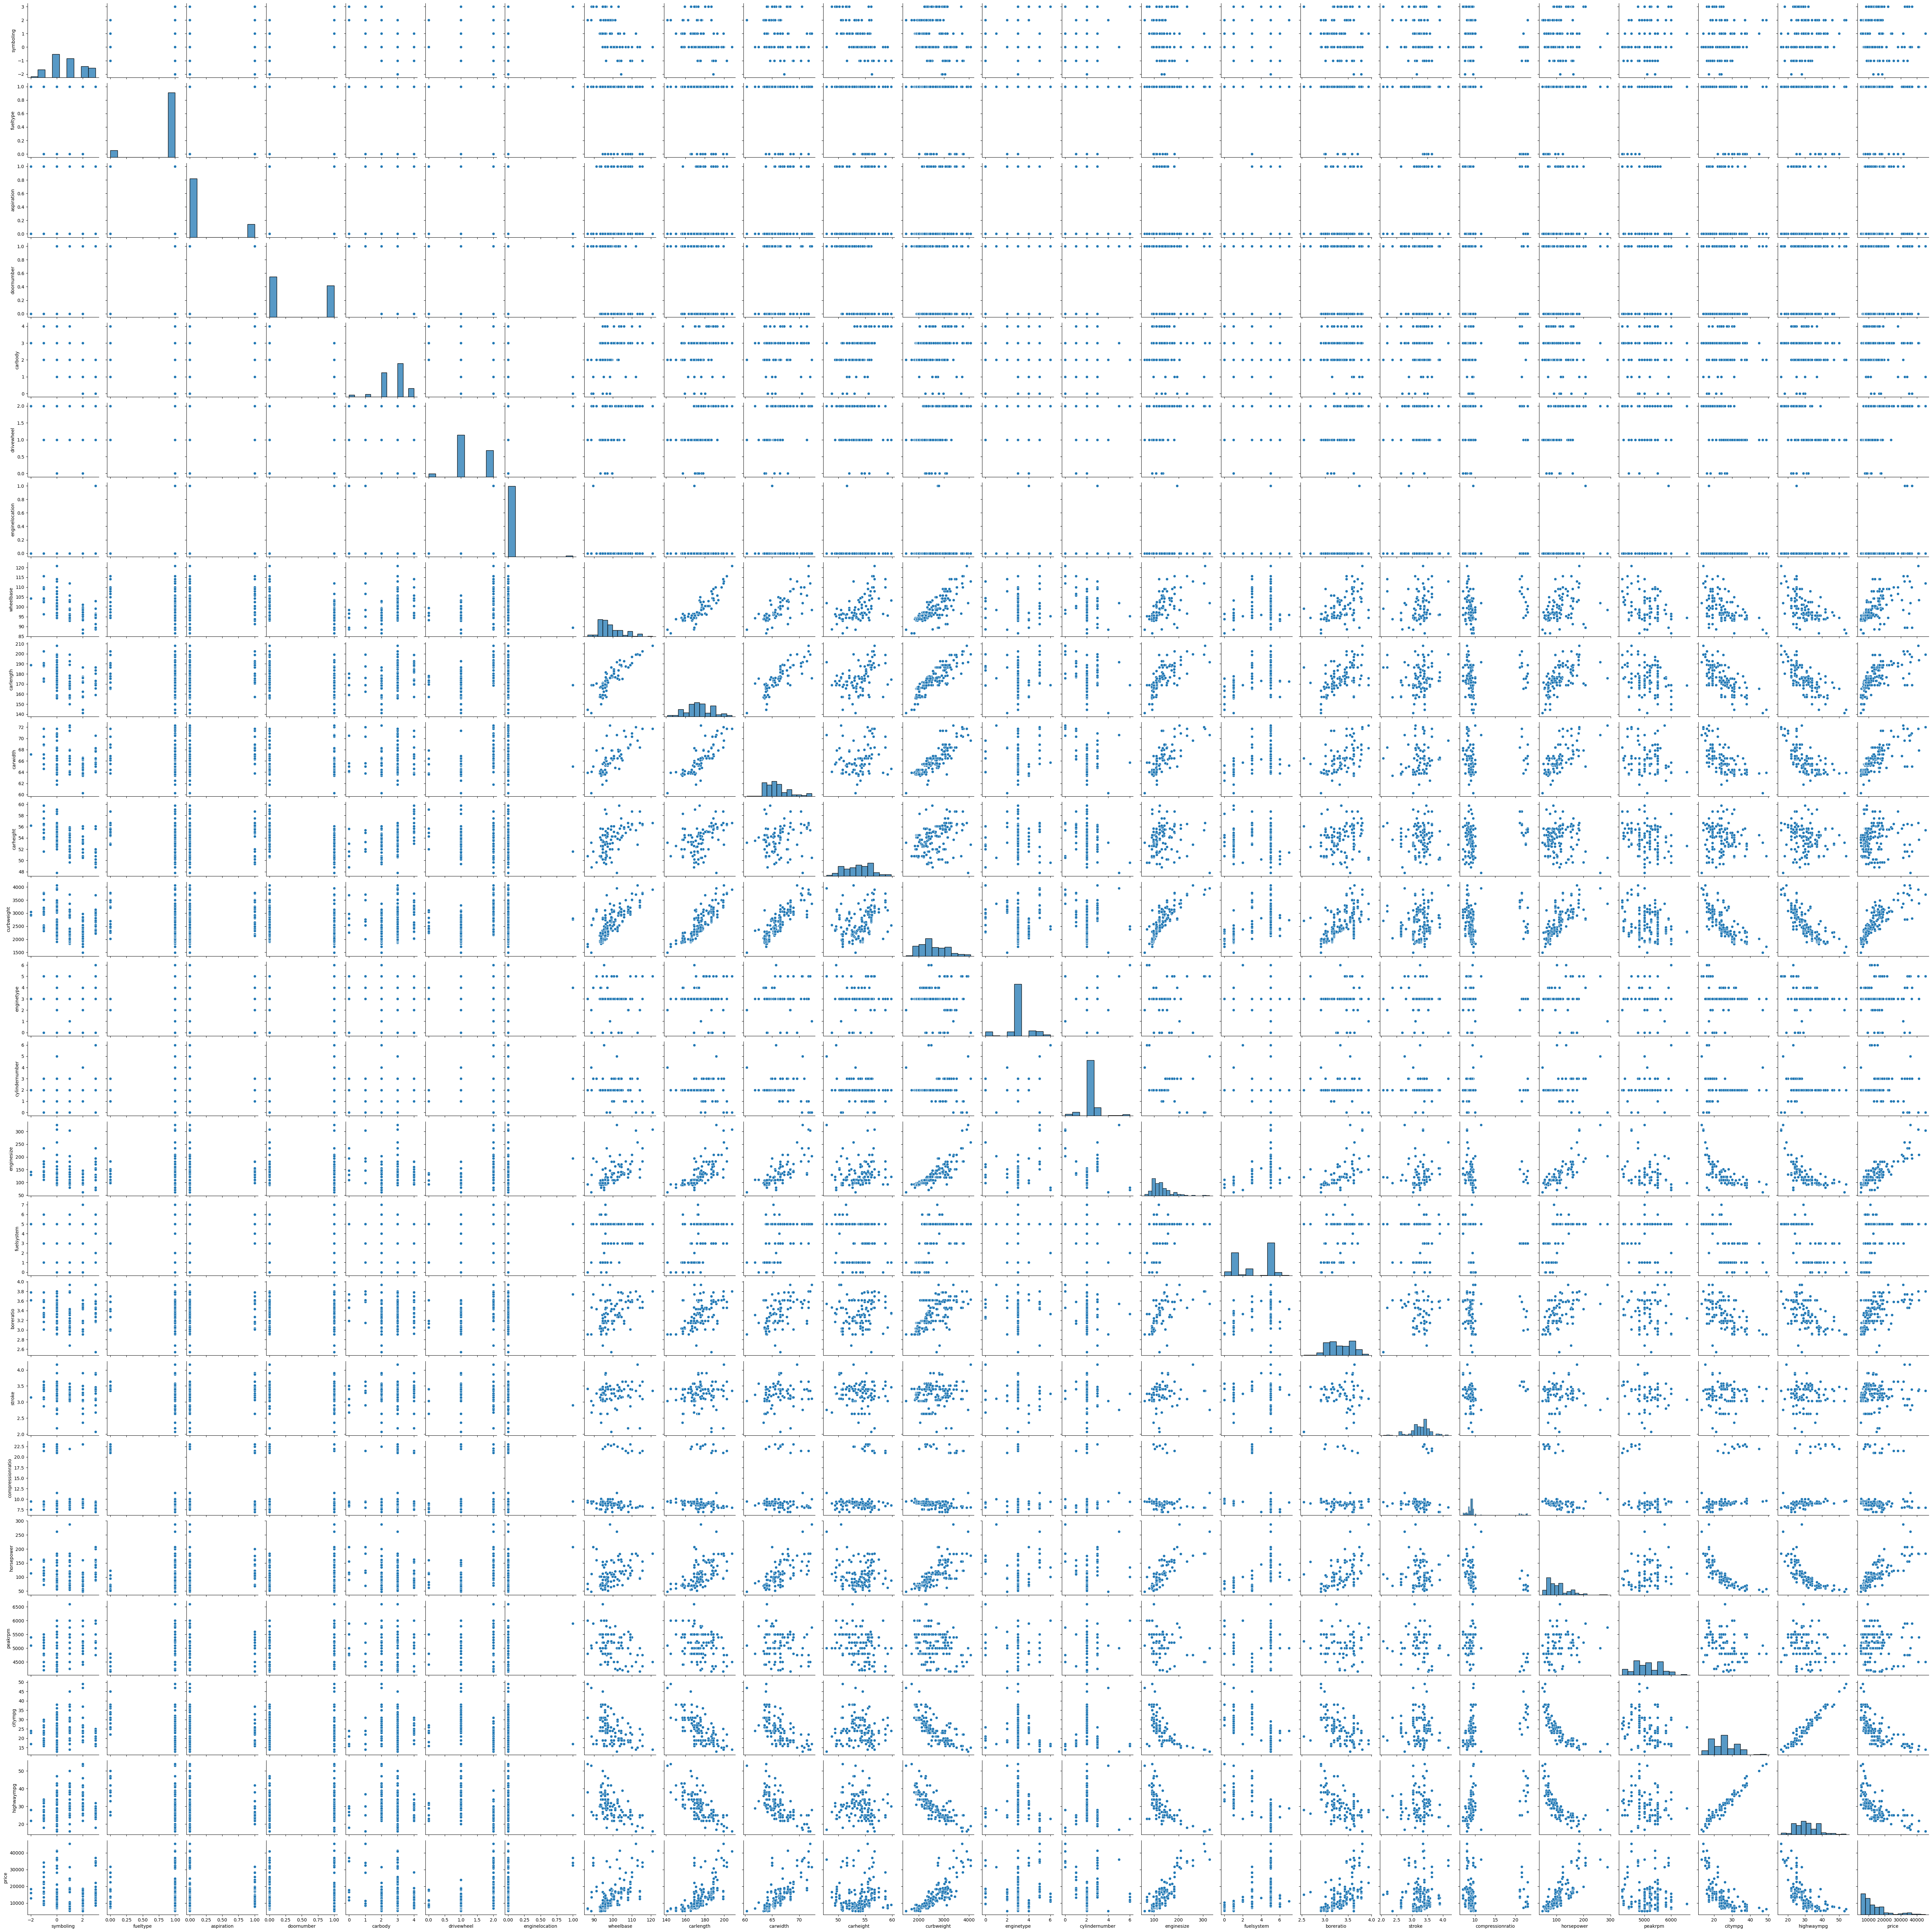

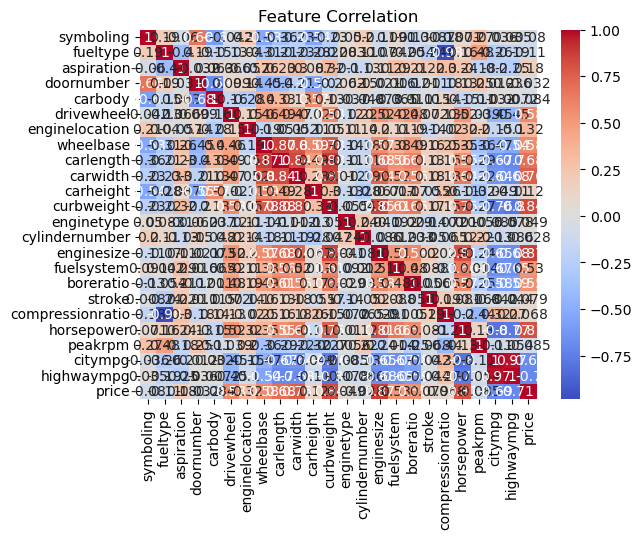

               Model           MSE  R² Score
0  Linear Regression  1.591639e+07  0.798384
1      Decision Tree  7.656590e+06  0.903012
2      Random Forest  3.165535e+06  0.959902
3                KNN  1.802749e+07  0.771642
4            XGBoost  5.099295e+06  0.935406


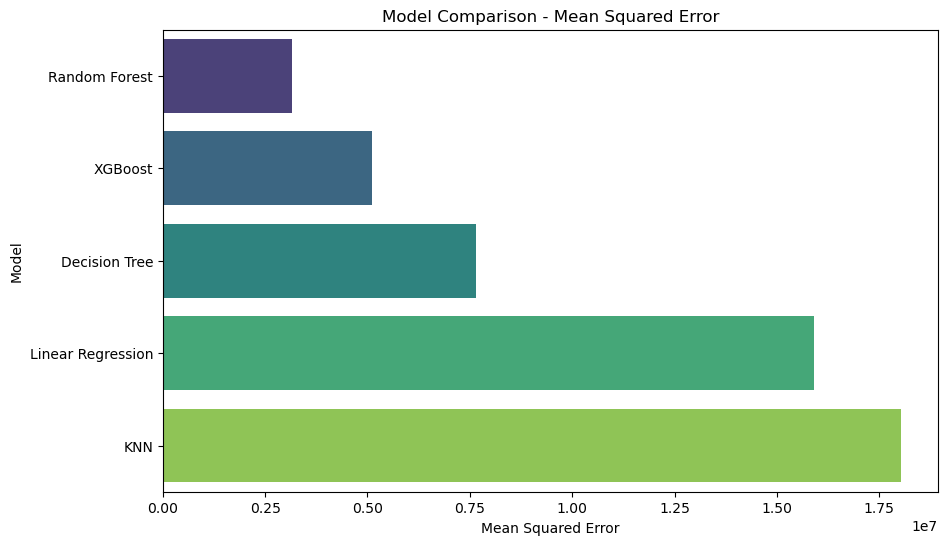

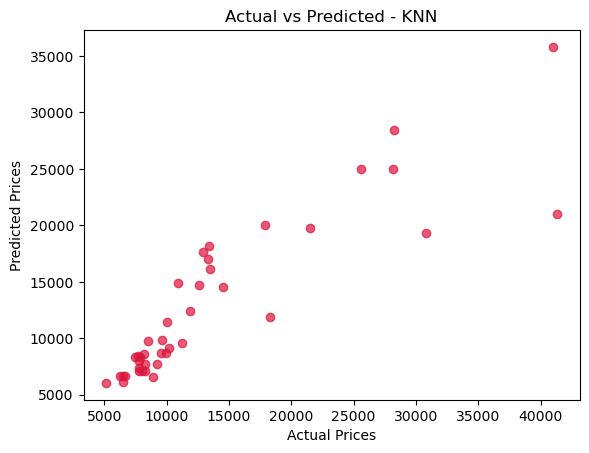

In [7]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Load Dataset
df = pd.read_csv('car.csv')
df.head()

# Data Preprocessing
df.info()
df.isnull().sum()

# Drop unnecessary column
df = df.drop(['car_ID', 'CarName'], axis=1)


# Encode categorical variables
label_encoder = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = label_encoder.fit_transform(df[col])


# Exploratory Data Analysis 
sns.pairplot(df)
plt.show()
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

# Train-Test Split
X = df.drop(['price'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training & Comparison
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=0),
    "KNN": KNeighborsRegressor(),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=0)
}
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((name, mse, r2))
    
# Evaluation Results
results_df = pd.DataFrame(results, columns=["Model", "MSE", "R² Score"])
results_df.sort_values("MSE", ascending=True)
print(results_df)

# Visual Comparison
plt.figure(figsize=(10,6))
sns.barplot(x="MSE", y="Model", data=results_df.sort_values("MSE", ascending=True), palette="viridis")
plt.title("Model Comparison - Mean Squared Error")
plt.xlabel("Mean Squared Error")
plt.ylabel("Model")
plt.show()

# Final Best Model (K-Nearest Neighbors)
best_model = KNeighborsRegressor()
best_model.fit(X_train, y_train)
final_preds = best_model.predict(X_test)

# Actual vs Predicted plot
plt.scatter(y_test, final_preds, alpha=0.7, color='crimson')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted - KNN")
plt.show()


